In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import os
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
os.chdir("/mnt/batch/tasks/shared/LS_root/mounts/clusters/dscpu/code/Users/Tamilselvan.S/Press Release/Data")
df=pd.read_csv("PR_FINAL_CLEANED.csv")

In [3]:
df=pd.read_excel("Press Release - Data.xlsx", engine = "openpyxl")

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


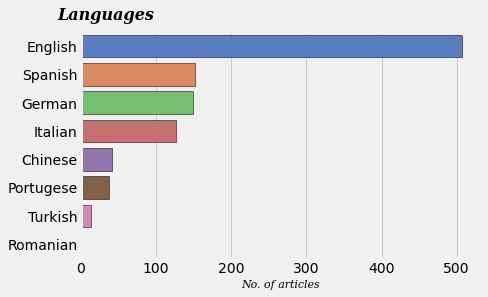

In [6]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(7,4),)
x = df["Language"].value_counts(normalize = True).index
y = df["Language"].value_counts(normalize = True).values * 100

x = df["Language"].value_counts().index
y = df["Language"].value_counts().values

sns.barplot(y,x,edgecolor='black', palette="muted")
fig.text(0.13, 0.99, 
                'Languages', 
                fontsize=16, fontweight='bold', fontstyle = "italic",
                fontfamily='serif')
plt.xlabel("No. of articles",fontsize=11, fontfamily='serif', fontstyle = "italic")
# ax.legend(loc='0', ncol=2,bbox_to_anchor=(0.1, -0.06), fontsize = 13)
fig.tight_layout()
plt.savefig('Language.png',bbox_inches = "tight")
plt.show()

In [4]:
df.head()

Category Date of release  \
0  Corporate Information      2021-04-01   
1  Corporate Information      2021-04-01   
2  Corporate Information      2021-04-02   
3                 Others      2021-04-05   
4               Offering      2021-04-05   

                                    Title / Contents          Issued by  \
0  NTT DATA Ranked No. 8 in Brand Finance's Lates...           NTT DATA   
1  Effective April 1, 2021: itelligence | NTT DAT...           NTT DATA   
2  NTT DATA to publish Digital Thought Leadership...           NTT DATA   
3  30 young talents changing life with everis & F...     NTT DATA EMEAL   
4     Transformer Neural Networks are Shaking up AI   NTT DATA Services   

    Country   Language                                        Description  \
0    Global    English  TOKYO – Apr 1, 2021 – NTT DATA, a global digit...   
1    Global    English  March 30, 2021\n itelligence | NTT DATA Busine...   
2    Global    English  TOKYO – Apr 2, 2021 – NTT DATA, a global digit...   
3  Portugal  Portugese  The everis & Fidelidade Academy starts today, ...   
4        US    English  Scott Boettcher, vice president of data intell...   

                                                 URL Marketing Contact  \
0  https://www.nttdata.com/global/en/media/press-...           Amy Baj   
1  https://us.nttdata.com/en/news/press-release/2...           Amy Baj   
2  https://www.nttdata.com/global/en/media/press-...           Amy Baj   
3  https://www.everis.com/portugal/pt-pt/news/new...  Cristina Cabeza    
4  https://searchenterpriseai.techtarget.com/feat...           Amy Baj   

       E mail for Marketing Contact  Quarter  Unique Count  Company  \
0               amy.baj@nttdata.com  2021 Q1           NaN      NaN   
1               amy.baj@nttdata.com  2021 Q1           NaN      NaN   
2               amy.baj@nttdata.com  2021 Q1           NaN      NaN   
3  cristina.cabeza.llata@everis.com  2021 Q1           NaN      NaN   
4               amy.baj@nttdata.com  2021 Q1           NaN      NaN   

  Issued_Short  
0  Global (HQ)  
1  Global (HQ)  
2  Global (HQ)  
3        EMEAL  
4     Services

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

cv = TfidfVectorizer(analyzer='word',       
                             min_df=8,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern = '[a-zA-Z]{3,}',  # num chars > 3
                             max_features=500,             # max number of uniq words
                             ngram_range = (1, 3)
                    )



In [10]:
train,test= train_test_split(df,test_size=0.3,random_state=26)


In [12]:
xtrain1= cv.fit_transform(train['Text'])
xtest1= cv.transform(test['Text'])
encode = LabelEncoder()
ytrain1 = encode.fit_transform(train['Category'])
ytest1 = encode.transform(test['Category'])

In [19]:
from sklearn.neural_network import MLPClassifier
clf_svm1 = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001))

# clf_svm1 = OneVsRestClassifier(SVC(C=0.8))
clf_svm1.fit(xtrain1, ytrain1)
pred_train2=clf_svm1.predict(xtrain1)
pred_test2=clf_svm1.predict(xtest1)


# Evaluating the model
print(f"Classification Report : \n\n{classification_report(ytrain1, pred_train2)}")
print(f"Classification Report : \n\n{classification_report(ytest1, pred_test2)}")

Iteration 1, loss = 0.67784531
Iteration 2, loss = 0.67625762
Iteration 3, loss = 0.67383654
Iteration 4, loss = 0.67071798
Iteration 5, loss = 0.66721871
Iteration 6, loss = 0.66326978
Iteration 7, loss = 0.65903193
Iteration 8, loss = 0.65478233
Iteration 9, loss = 0.65027875
Iteration 10, loss = 0.64566443
Iteration 11, loss = 0.64115114
Iteration 12, loss = 0.63669690
Iteration 13, loss = 0.63206304
Iteration 14, loss = 0.62764396
Iteration 15, loss = 0.62319226
Iteration 16, loss = 0.61897605
Iteration 17, loss = 0.61501332
Iteration 18, loss = 0.61076741
Iteration 19, loss = 0.60685483
Iteration 20, loss = 0.60316146
Iteration 21, loss = 0.59916744
Iteration 22, loss = 0.59568544
Iteration 23, loss = 0.59210912
Iteration 24, loss = 0.58874208
Iteration 25, loss = 0.58545791
Iteration 26, loss = 0.58233842
Iteration 27, loss = 0.57930133
Iteration 28, loss = 0.57630276
Iteration 29, loss = 0.57337695
Iteration 30, loss = 0.57052234
Iteration 31, loss = 0.56797273
Iteration 32, los

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 16, loss = 0.55888271
Iteration 17, loss = 0.55093119
Iteration 18, loss = 0.54315743
Iteration 19, loss = 0.53583472
Iteration 20, loss = 0.52848660
Iteration 21, loss = 0.52137777
Iteration 22, loss = 0.51439088
Iteration 23, loss = 0.50762258
Iteration 24, loss = 0.50104287
Iteration 25, loss = 0.49482002
Iteration 26, loss = 0.48848827
Iteration 27, loss = 0.48268842
Iteration 28, loss = 0.47684508
Iteration 29, loss = 0.47116247
Iteration 30, loss = 0.46573218
Iteration 31, loss = 0.46032987
Iteration 32, loss = 0.45533832
Iteration 33, loss = 0.45045100
Iteration 34, loss = 0.44545097
Iteration 35, loss = 0.44068847
Iteration 36, loss = 0.43628748
Iteration 37, loss = 0.43180037
Iteration 38, loss = 0.42766796
Iteration 39, loss = 0.42344904
Iteration 40, loss = 0.41955504
Iteration 41, loss = 0.41559183
Iteration 42, loss = 0.41187320
Iteration 43, loss = 0.40826566
Iteration 44, loss = 0.40468325
Iteration 45, loss = 0.40127803
Iteration 46, loss = 0.39814853
Iteratio

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 4, loss = 0.65424088
Iteration 5, loss = 0.64722959
Iteration 6, loss = 0.63934989
Iteration 7, loss = 0.63112035
Iteration 8, loss = 0.62234344
Iteration 9, loss = 0.61347954
Iteration 10, loss = 0.60450497
Iteration 11, loss = 0.59530912
Iteration 12, loss = 0.58621592
Iteration 13, loss = 0.57727757
Iteration 14, loss = 0.56835614
Iteration 15, loss = 0.55971839
Iteration 16, loss = 0.55112034
Iteration 17, loss = 0.54275000
Iteration 18, loss = 0.53466752
Iteration 19, loss = 0.52650837
Iteration 20, loss = 0.51855881
Iteration 21, loss = 0.51127299
Iteration 22, loss = 0.50389764
Iteration 23, loss = 0.49658841
Iteration 24, loss = 0.48990734
Iteration 25, loss = 0.48295414
Iteration 26, loss = 0.47637009
Iteration 27, loss = 0.47000219
Iteration 28, loss = 0.46381667
Iteration 29, loss = 0.45781025
Iteration 30, loss = 0.45208643
Iteration 31, loss = 0.44645842
Iteration 32, loss = 0.44089603
Iteration 33, loss = 0.43558364
Iteration 34, loss = 0.43035382
Iteration 35,

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 29, loss = 0.63690895
Iteration 30, loss = 0.63566687
Iteration 31, loss = 0.63459593
Iteration 32, loss = 0.63343403
Iteration 33, loss = 0.63233284
Iteration 34, loss = 0.63145691
Iteration 35, loss = 0.63049107
Iteration 36, loss = 0.62940345
Iteration 37, loss = 0.62855591
Iteration 38, loss = 0.62767921
Iteration 39, loss = 0.62678918
Iteration 40, loss = 0.62598176
Iteration 41, loss = 0.62515275
Iteration 42, loss = 0.62442074
Iteration 43, loss = 0.62365372
Iteration 44, loss = 0.62299645
Iteration 45, loss = 0.62228496
Iteration 46, loss = 0.62162075
Iteration 47, loss = 0.62100267
Iteration 48, loss = 0.62040399
Iteration 49, loss = 0.61979234
Iteration 50, loss = 0.61922792
Iteration 51, loss = 0.61867301
Iteration 52, loss = 0.61815041
Iteration 53, loss = 0.61757141
Iteration 54, loss = 0.61717479
Iteration 55, loss = 0.61669314
Iteration 56, loss = 0.61622715
Iteration 57, loss = 0.61578635
Iteration 58, loss = 0.61536951
Iteration 59, loss = 0.61493417
Iteratio

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 9, loss = 0.59558927
Iteration 10, loss = 0.58400507
Iteration 11, loss = 0.57237865
Iteration 12, loss = 0.56069583
Iteration 13, loss = 0.54910182
Iteration 14, loss = 0.53774181
Iteration 15, loss = 0.52641732
Iteration 16, loss = 0.51551835
Iteration 17, loss = 0.50465780
Iteration 18, loss = 0.49408317
Iteration 19, loss = 0.48376154
Iteration 20, loss = 0.47366845
Iteration 21, loss = 0.46396653
Iteration 22, loss = 0.45419333
Iteration 23, loss = 0.44496218
Iteration 24, loss = 0.43588834
Iteration 25, loss = 0.42706284
Iteration 26, loss = 0.41848259
Iteration 27, loss = 0.41007947
Iteration 28, loss = 0.40197644
Iteration 29, loss = 0.39413365
Iteration 30, loss = 0.38654813
Iteration 31, loss = 0.37912305
Iteration 32, loss = 0.37184700
Iteration 33, loss = 0.36485633
Iteration 34, loss = 0.35812572
Iteration 35, loss = 0.35149250
Iteration 36, loss = 0.34509697
Iteration 37, loss = 0.33898672
Iteration 38, loss = 0.33283927
Iteration 39, loss = 0.32697635
Iteration

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.67191766
Iteration 3, loss = 0.66892246
Iteration 4, loss = 0.66507246
Iteration 5, loss = 0.66066285
Iteration 6, loss = 0.65569421
Iteration 7, loss = 0.65044890
Iteration 8, loss = 0.64505360
Iteration 9, loss = 0.63931668
Iteration 10, loss = 0.63385721
Iteration 11, loss = 0.62799399
Iteration 12, loss = 0.62214857
Iteration 13, loss = 0.61674958
Iteration 14, loss = 0.61118154
Iteration 15, loss = 0.60560689
Iteration 16, loss = 0.60027384
Iteration 17, loss = 0.59508274
Iteration 18, loss = 0.58982811
Iteration 19, loss = 0.58502929
Iteration 20, loss = 0.58011786
Iteration 21, loss = 0.57535720
Iteration 22, loss = 0.57096344
Iteration 23, loss = 0.56648507
Iteration 24, loss = 0.56229844
Iteration 25, loss = 0.55788198
Iteration 26, loss = 0.55399053
Iteration 27, loss = 0.55015163
Iteration 28, loss = 0.54651161
Iteration 29, loss = 0.54279277
Iteration 30, loss = 0.53927715
Iteration 31, loss = 0.53581843
Iteration 32, loss = 0.53251654
Iteration 33, lo

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 23, loss = 0.54797349
Iteration 24, loss = 0.54285962
Iteration 25, loss = 0.53808945
Iteration 26, loss = 0.53358413
Iteration 27, loss = 0.52900039
Iteration 28, loss = 0.52459288
Iteration 29, loss = 0.52037540
Iteration 30, loss = 0.51640675
Iteration 31, loss = 0.51233563
Iteration 32, loss = 0.50855830
Iteration 33, loss = 0.50486911
Iteration 34, loss = 0.50121265
Iteration 35, loss = 0.49776222
Iteration 36, loss = 0.49450040
Iteration 37, loss = 0.49132909
Iteration 38, loss = 0.48811749
Iteration 39, loss = 0.48519035
Iteration 40, loss = 0.48212413
Iteration 41, loss = 0.47944344
Iteration 42, loss = 0.47666481
Iteration 43, loss = 0.47405961
Iteration 44, loss = 0.47163497
Iteration 45, loss = 0.46902661
Iteration 46, loss = 0.46664730
Iteration 47, loss = 0.46438368
Iteration 48, loss = 0.46229161
Iteration 49, loss = 0.46013959
Iteration 50, loss = 0.45795306
Iteration 51, loss = 0.45596370
Iteration 52, loss = 0.45414414
Iteration 53, loss = 0.45229661
Iteratio

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 8, loss = 0.60824055
Iteration 9, loss = 0.59696675
Iteration 10, loss = 0.58552195
Iteration 11, loss = 0.57403672
Iteration 12, loss = 0.56259378
Iteration 13, loss = 0.55126608
Iteration 14, loss = 0.53995922
Iteration 15, loss = 0.52887627
Iteration 16, loss = 0.51793230
Iteration 17, loss = 0.50727164
Iteration 18, loss = 0.49677710
Iteration 19, loss = 0.48666114
Iteration 20, loss = 0.47664994
Iteration 21, loss = 0.46709364
Iteration 22, loss = 0.45760176
Iteration 23, loss = 0.44840886
Iteration 24, loss = 0.43949039
Iteration 25, loss = 0.43081705
Iteration 26, loss = 0.42216420
Iteration 27, loss = 0.41402504
Iteration 28, loss = 0.40610162
Iteration 29, loss = 0.39833845
Iteration 30, loss = 0.39077410
Iteration 31, loss = 0.38344349
Iteration 32, loss = 0.37640889
Iteration 33, loss = 0.36951791
Iteration 34, loss = 0.36286657
Iteration 35, loss = 0.35628701
Iteration 36, loss = 0.35006059
Iteration 37, loss = 0.34395636
Iteration 38, loss = 0.33799685
Iteration 

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_clas

In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer

clf_svm1 = OneVsRestClassifier(SVC(C=0.8))
clf_svm1.fit(xtrain1, ytrain1)
pred_train2=clf_svm1.predict(xtrain1)
pred_test2=clf_svm1.predict(xtest1)

# Evaluating the model
print(f"Classification Report : \n\n{classification_report(ytrain1, pred_train2)}")
print(f"Classification Report : \n\n{classification_report(ytest1, pred_test2)}")

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.97      0.97      0.97        31
           2       0.96      1.00      0.98        27
           3       0.98      0.99      0.99       104
           4       1.00      1.00      1.00         8
           5       1.00      0.96      0.98        57
           6       1.00      0.96      0.98        49
           7       1.00      1.00      1.00         9

    accuracy                           0.98       354
   macro avg       0.98      0.98      0.98       354
weighted avg       0.98      0.98      0.98       354

Classification Report : 

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.62      0.87      0.72        15
           2       0.80      0.63      0.71        19
           3       0.61      0.85      0.71        46
           4       1.00   

In [14]:
pred = encode.inverse_transform(pred_test2)
actual = encode.inverse_transform(ytest1)


In [15]:
testdata=test

In [16]:
testdata['pred'] = pred
testdata['actual'] = actual


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
testdata

Category Date of release  \
130        Award/Contest Winner      2021-07-13   
187                      Others      2021-09-28   
129        Business Partnership      2021-07-12   
32        Corporate Information      2021-04-30   
36   AR Report / Market Insight      2021-05-04   
..                          ...             ...   
239                    Offering      2021-11-22   
275                      Others      2022-01-10   
273        Business Partnership      2022-01-07   
271        Merger & Acquisition      2022-01-06   
61         Business Partnership      2021-05-20   

                                      Title / Contents          Issued by  \
130  CSU Pueblo’s Campus COVID Response Judged Amon...  NTT DATA Services   
187  NTT DATA Ranks No. 6 on IDC FinTech Rankings E...   NTT DATA Romania   
129  NTT DATA UK announces new partnership with rou...        NTT DATA UK   
32   NTT DATA Group Companies, everis and itelligen...           NTT DATA   
36   Why States Should Modernize and Future Proof A...  NTT DATA Services   
..                                                 ...                ...   
239                            Digital With a Purpose   NTT DATA Services   
275       HIStalk Interviews Lisa Esch, SVP, NTT DATA   NTT DATA Services   
273            Smart Park Pilot Launched in Las Vegas   NTT DATA Services   
271  NTT DATA Completes Acquisition of Chainalytics...  NTT DATA Services   
61   Edmonton Airport Developing App for On Demand ...  NTT DATA Services   

     Country Language                                        Description  \
130       US  English  The American Association of State Colleges and...   
187  Romania  English  September 28, 2021, Cluj-Napoca - NTT DATA, a ...   
129       UK  English  NTT DATA UK has announced a new partnership wi...   
32    Global  English  April 30, 2021, Tokyo – NTT DATA, a leading di...   
36        US  English  COMMENTARY | States have largely ignored IT mo...   
..       ...      ...                                                ...   
239       US  English  In 2020 with the pandemic we got a sample of t...   
275       US  English  I’ve been with the company for a little over a...   
273       US  English  Clark County, Nevada, is partnering with NTT t...   
271       US  English  PLANO, Texas – Jan. 6, 2022 – NTT DATA Service...   
61        US  English  Edmonton’s airport is teaming up with a Japane...   

                                                   URL Marketing Contact  \
130  https://www.denverpost.com/2021/07/13/csu-pueb...           Amy Baj   
187  https://ro.nttdata.com/insights/press-releases...       Axenia Sova   
129  https://uk.nttdata.com/news/ntt-data-uk-announ...         Jon Burch   
32   https://www.nttdata.com/global/en/media/press-...           Amy Baj   
36   https://www.route-fifty.com/tech-data/2021/05/...           Amy Baj   
..                                                 ...               ...   
239  https://vmblog.com/archive/2021/11/22/ntt-data...           Amy Baj   
275  https://histalk2.com/2022/01/10/histalk-interv...           Amy Baj   
273  https://www.smartcitiesworld.net/parks-and-gre...           Amy Baj   
271  https://us.nttdata.com/en/news/press-release/2...           Amy Baj   
61   https://edmontonjournal.com/technology/tech-bi...           Amy Baj   

    E mail for Marketing Contact  Quarter  Unique Count  Company Issued_Short  \
130          amy.baj@nttdata.com  2021 Q2           NaN      NaN     Services   
187       axenia.sova@nttdata.ro  2021 Q2           NaN      NaN      Romania   
129   Jonathan.Burch@nttdata.com  2021 Q2           NaN      NaN           UK   
32           amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   
36           amy.baj@nttdata.com  2021 Q1           NaN      NaN     Services   
..                           ...      ...           ...      ...          ...   
239          amy.baj@nttdata.com  2021 Q3           NaN      NaN     Services   
275        

In [6]:
df=pd.read_excel("Actual_predicted (1).xlsx",engine = "openpyxl" , sheet_name = -1)

In [7]:
df.head(2)

Category      Date of release  \
0  Corporate Information  2021-01-04 00:00:00   
1  Corporate Information  2021-01-04 00:00:00   

                                    Title / Contents Issued by Country  \
0  NTT DATA Ranked No. 8 in Brand Finance's Lates...  NTT DATA  Global   
1  Effective April 1, 2021: itelligence | NTT DAT...  NTT DATA  Global   

  Language                                        Description  \
0  English  TOKYO ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Å“ Apr 1, 2021 ÃƒÂ¢Ã¢â€š...   
1  English  March 30, 2021\n itelligence | NTT DATA Busine...   

                                                 URL Marketing Contact  \
0  https://www.nttdata.com/global/en/media/press-...           Amy Baj   
1  https://us.nttdata.com/en/news/press-release/2...           Amy Baj   

  E mail for Marketing Contact  Quarter  Unique Count  Company Issued_Short  \
0          amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   
1          amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   

  Mannual Classification Deeplearning Classification Mismatch  
0  Corporate Information       Corporate Information       No  
1  Corporate Information       Corporate Information       No

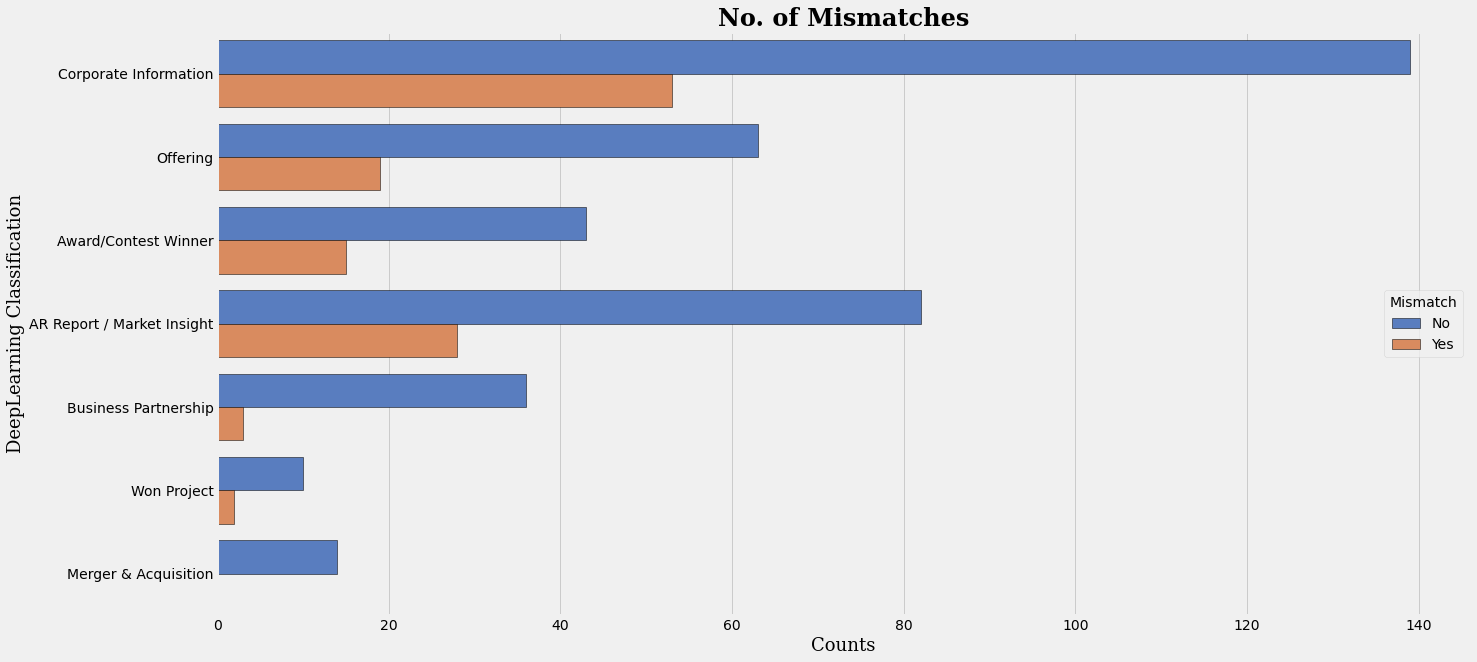

In [39]:
plt.figure(figsize=(20,10))
plt.style.use("fivethirtyeight")
plt.title("No. of Mismatches",fontsize=24, fontweight='bold', fontfamily='serif')
sns.countplot(y = df["Deeplearning Classification"],edgecolor='black', palette="muted", hue = df["Mismatch"], )
plt.xlabel("Counts",fontsize=18, fontfamily='serif')
plt.ylabel("DeepLearning Classification",fontsize=18, fontfamily='serif')
plt.savefig('mismatches.png',bbox_inches = "tight")

In [27]:
x = df["Category"].value_counts(normalize = True).index
y = df["Category"].value_counts(normalize = True).values * 100

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


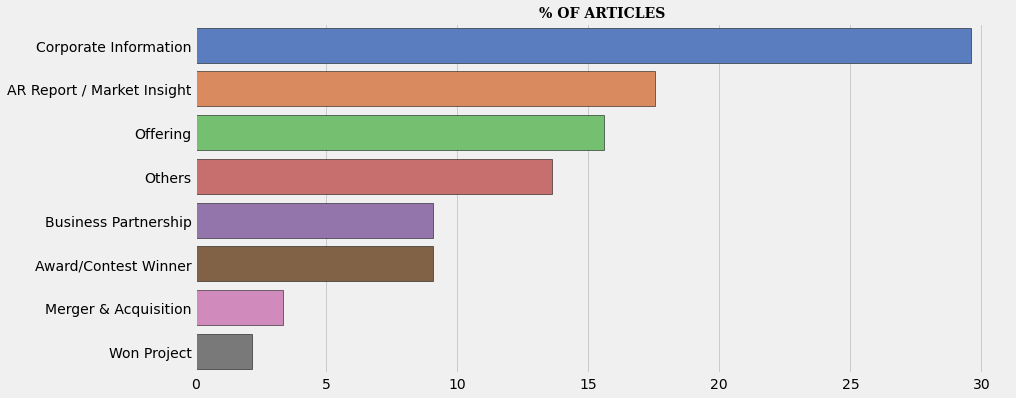

In [42]:
plt.figure(figsize=(13,6))
plt.style.use("fivethirtyeight")
plt.title("% OF ARTICLES",fontsize=14, fontweight='bold', fontfamily='serif')
sns.barplot(y,x,edgecolor='black', palette="muted")
plt.savefig('percentageofcarticles.png',bbox_inches = "tight")
plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


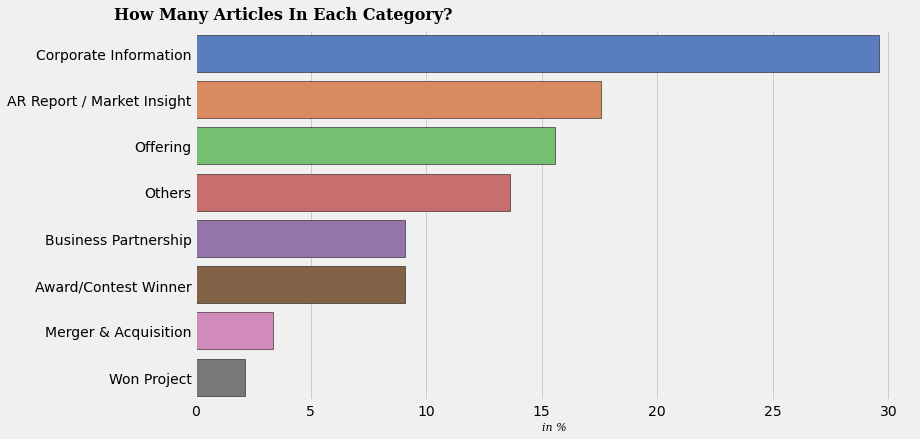

In [57]:
fig, ax = plt.subplots(1,1,figsize=(13,6),)
x = df["Category"].value_counts(normalize = True).index
y = df["Category"].value_counts(normalize = True).values * 100
sns.barplot(y,x,edgecolor='black', palette="muted")
fig.text(0.13, 0.99, 
                'How Many Articles In Each Category?', 
                fontsize=16, fontweight='bold', 
                fontfamily='serif')
plt.xlabel("in %",fontsize=11, fontfamily='serif',fontstyle = "italic")
# ax.legend(loc='0', ncol=2,bbox_to_anchor=(0.1, -0.06), fontsize = 13)
fig.tight_layout()
plt.savefig('percentageofcarticles.png',bbox_inches = "tight")
plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


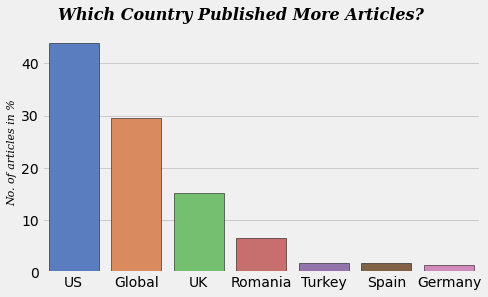

In [65]:
fig, ax = plt.subplots(1,1,figsize=(7,4),)
x = df["Country"].value_counts(normalize = True).index
y = df["Country"].value_counts(normalize = True).values * 100
sns.barplot(x,y,edgecolor='black', palette="muted")
fig.text(0.13, 0.99, 
                'Which Country Published More Articles?', 
                fontsize=16, fontweight='bold', fontstyle = "italic",
                fontfamily='serif')
plt.ylabel("No. of articles in %",fontsize=11, fontfamily='serif', fontstyle = "italic")
# ax.legend(loc='0', ncol=2,bbox_to_anchor=(0.1, -0.06), fontsize = 13)
fig.tight_layout()
plt.savefig('country.png',bbox_inches = "tight")
plt.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


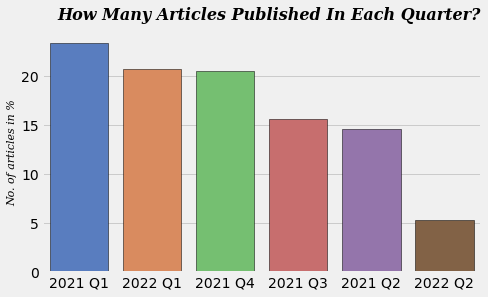

In [64]:
fig, ax = plt.subplots(1,1,figsize=(7,4),)
x = df["Quarter"].value_counts(normalize = True).index
y = df["Quarter"].value_counts(normalize = True).values * 100
sns.barplot(x,y,edgecolor='black', palette="muted")
fig.text(0.13, 0.99, 
                'How Many Articles Published In Each Quarter?', 
                fontsize=16, fontweight='bold', fontstyle = "italic",
                fontfamily='serif')
plt.ylabel("No. of articles in %",fontsize=11, fontfamily='serif', fontstyle = "italic")
# ax.legend(loc='0', ncol=2,bbox_to_anchor=(0.1, -0.06), fontsize = 13)
fig.tight_layout()
plt.savefig('quarter.png',bbox_inches = "tight")
plt.show()

In [59]:
df["Quarter"].value_counts()

2021 Q1    118
2022 Q1    105
2021 Q4    104
2021 Q3     79
2021 Q2     74
2022 Q2     27
Name: Quarter, dtype: int64

In [6]:
import pandas as pd
os.chdir("/mnt/batch/tasks/shared/LS_root/mounts/clusters/dscpu/code/Users/Tamilselvan.S/Press Release/Data")


In [7]:
df = pd.read_csv("Actual_predicted (1) (1).csv")

In [11]:
others = df[df["actual_cat"] == "Others"]

In [24]:
others.shape

(69, 16)

In [12]:
others["predicted_cat"].value_counts()

Corporate Information         29
Offering                      17
AR Report / Market Insight    16
Award/Contest Winner           7
Name: predicted_cat, dtype: int64

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


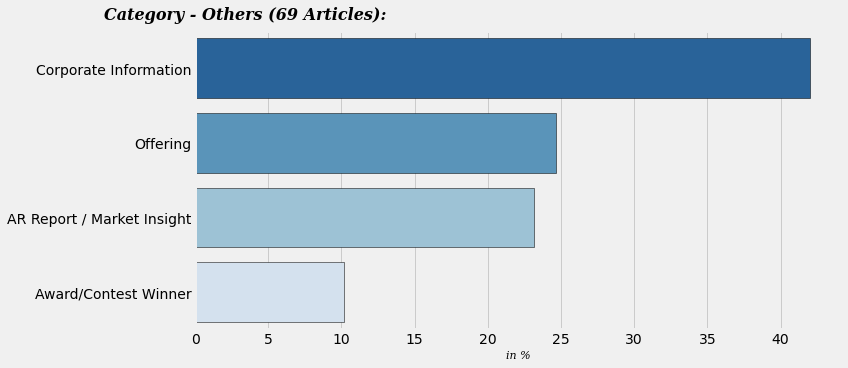

In [31]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,5),)
x = others["predicted_cat"].value_counts(normalize = True).index
y = others["predicted_cat"].value_counts(normalize = True).values * 100
sns.barplot(y,x,edgecolor='black', palette="Blues_r")
fig.text(0.13, 0.99, 
                'Category - Others (69 Articles):', 
                fontsize=16, fontweight='bold', fontstyle = "italic",
                fontfamily='serif')
plt.xlabel("in %",fontsize=11, fontfamily='serif',fontstyle = "italic")
# ax.legend(loc='0', ncol=2,bbox_to_anchor=(0.1, -0.06), fontsize = 13)
fig.tight_layout()
plt.savefig('others.png',bbox_inches = "tight")
plt.show()